#### NPZ데이터 로딩

In [1]:
import numpy as np

In [2]:
data = np.load("./data/cnn_data.npz")

In [3]:
X_train = data['X_train']
X_test = data['X_test']
y_train = data['y_train']
y_test = data['y_test']

In [4]:
X_train.shape, y_train.shape

((478, 224, 224, 3), (478,))

In [5]:
X_test.shape, y_test.shape

((120, 224, 224, 3), (120,))

### 정답 데이터 확률정보로 변경하기

In [6]:
from tensorflow.keras.utils import to_categorical #정답데이터 확률정보로 변경

In [7]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [8]:
y_train

array([[0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.]], dtype=float32)

#### MPL 모델링
1. 모델설계(레이어 쌓기)
2. 모델컴파일(손실함수, 최적화도구, 평가방법 설정)
3. 모델학습
4. 모델평가
5. 모델학습 결과 시작화(history 객체활용

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten   #flatten 데이터를 1차원으로 만듬
from tensorflow.keras.layers import InputLayer #입력층

In [10]:
#1. 모델 설계
mlp_model = Sequential()
#입력층
mlp_model.add(InputLayer(input_shape=(224,224,3)))
mlp_model.add(Flatten())  #입력 데이터를 1차원으로 펴주는 레이어
#중간층
mlp_model.add(Dense(64, activation="relu"))
mlp_model.add(Dense(128, activation="relu"))
mlp_model.add(Dense(64, activation="relu"))
#출력층
mlp_model.add(Dense(3, activation="softmax"))

In [11]:
#2. 모델 컴파일 (학습방법 설정)
mlp_model.compile(loss="categorical_crossentropy",
                 optimizer="Adam",
                 metrics=['accuracy'])

In [12]:
#3.모델 학습
history = mlp_model.fit(X_train, y_train,
                       epochs=50, #반복횟수?
                       validation_split=0.2)  #검증데이터?

Train on 382 samples, validate on 96 samples
Epoch 1/50
382/382 [==============================] - 1s 3ms/sample - loss: 3353.6568 - accuracy: 0.3770 - val_loss: 1643.7017 - val_accuracy: 0.3229
Epoch 2/50
382/382 [==============================] - 0s 806us/sample - loss: 1667.7852 - accuracy: 0.3743 - val_loss: 3973.9609 - val_accuracy: 0.3125
Epoch 3/50
382/382 [==============================] - 0s 753us/sample - loss: 2219.0364 - accuracy: 0.3665 - val_loss: 506.7829 - val_accuracy: 0.3542
Epoch 4/50
382/382 [==============================] - 0s 847us/sample - loss: 470.3235 - accuracy: 0.4293 - val_loss: 958.0267 - val_accuracy: 0.3542
Epoch 5/50
382/382 [==============================] - 0s 863us/sample - loss: 532.2563 - accuracy: 0.4869 - val_loss: 439.3855 - val_accuracy: 0.3542
Epoch 6/50
382/382 [==============================] - 0s 729us/sample - loss: 383.5902 - accuracy: 0.4398 - val_loss: 317.0946 - val_accuracy: 0.3958
Epoch 7/50
382/382 [==============================] 

In [13]:
#4. 모델평가
mlp_model.evaluate(X_test, y_test)

120/120 [==============================] - 0s 1ms/sample - loss: 203.1540 - accuracy: 0.3583


[203.15403391520184, 0.35833332]

In [14]:
#5. 학습결과 시각화

In [15]:
import matplotlib.pyplot as plt

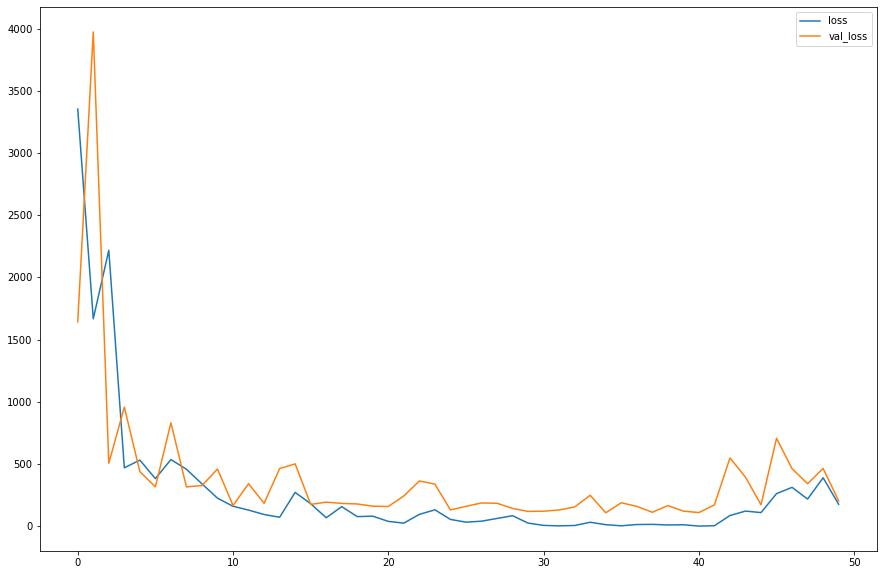

In [16]:
plt.figure(figsize=(15,10))
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()
                         

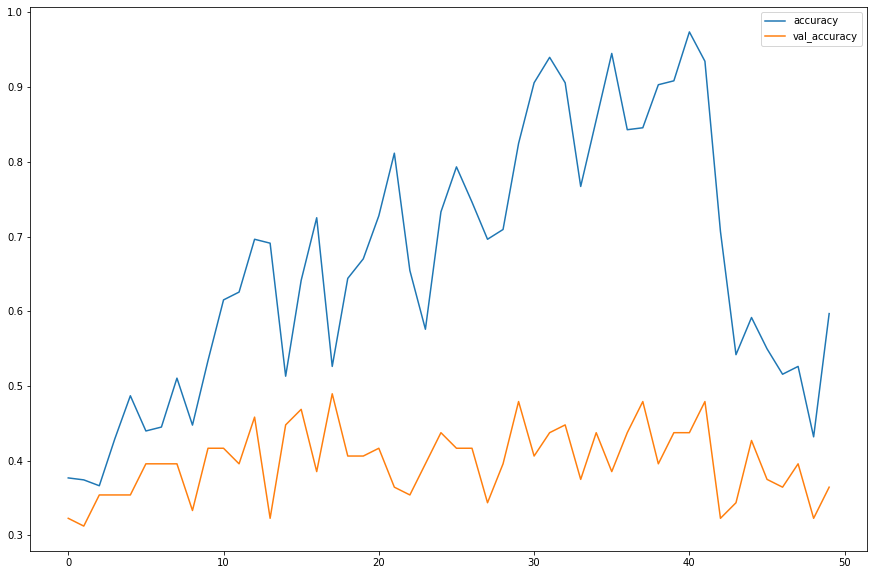

In [17]:
plt.figure(figsize=(15,10))
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()

### CNN 모델링

In [18]:
from tensorflow.keras.layers import Conv2D  #주요 특성을 강조하는 레이어
from tensorflow.keras.layers import MaxPooling2D  #불필요한 데이터 삭제

In [19]:
#1. 모델 설계
cnn_model = Sequential()
#입력층
cnn_model.add(InputLayer(input_shape=(224,224,3)))

#CNN 레이어(특성추출부) 중간층처럼 여러번쓸수있다
cnn_model.add(Conv2D(filters=32,
                    kernel_size=(3,3),
                    padding='same',
                    activation='relu'))
cnn_model.add(MaxPooling2D())

cnn_model.add(Conv2D(filters=64,
                     kernel_size=(3,3),
                     padding='same',
                     activation='relu'))
cnn_model.add(MaxPooling2D())

cnn_model.add(Flatten())  #입력 데이터를 1차원으로 펴주는 레이어
#중간층
cnn_model.add(Dense(64, activation="relu"))
cnn_model.add(Dense(128, activation="relu"))
cnn_model.add(Dense(64, activation="relu"))
#출력층
cnn_model.add(Dense(3, activation="softmax"))

In [20]:
#2. 모델 컴파일 (학습방법 설정)
cnn_model.compile(loss="categorical_crossentropy",
                 optimizer="Adam",
                 metrics=['accuracy'])

In [21]:
cnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 200704)            0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)                12845120  
_________________________________________________________________
dense_5 (Dense)              (None, 128)              

In [22]:
#3.모델 학습
history2 = cnn_model.fit(X_train, y_train,
                       epochs=50, #반복횟수?
                       validation_split=0.2)  #검증데이터?

Train on 382 samples, validate on 96 samples
Epoch 1/50
382/382 [==============================] - 3s 7ms/sample - loss: 350.8410 - accuracy: 0.3403 - val_loss: 2.4090 - val_accuracy: 0.3646
Epoch 2/50
382/382 [==============================] - 1s 1ms/sample - loss: 1.3719 - accuracy: 0.3979 - val_loss: 1.0685 - val_accuracy: 0.4479
Epoch 3/50
382/382 [==============================] - 1s 1ms/sample - loss: 0.9606 - accuracy: 0.5733 - val_loss: 1.0745 - val_accuracy: 0.3854
Epoch 4/50
382/382 [==============================] - 1s 2ms/sample - loss: 0.7918 - accuracy: 0.7173 - val_loss: 1.0492 - val_accuracy: 0.4688
Epoch 5/50
382/382 [==============================] - 1s 2ms/sample - loss: 0.5236 - accuracy: 0.8665 - val_loss: 1.3851 - val_accuracy: 0.4167
Epoch 6/50
382/382 [==============================] - 1s 2ms/sample - loss: 0.2988 - accuracy: 0.9450 - val_loss: 1.4893 - val_accuracy: 0.4583
Epoch 7/50
382/382 [==============================] - 1s 2ms/sample - loss: 0.1864 - accu

In [23]:
#4. 모델평가
cnn_model.evaluate(X_test, y_test)

120/120 [==============================] - 0s 3ms/sample - loss: 3.3844 - accuracy: 0.4333


[3.3844337463378906, 0.43333334]

In [24]:
#5. 학습결과 시각화
import matplotlib.pyplot as plt

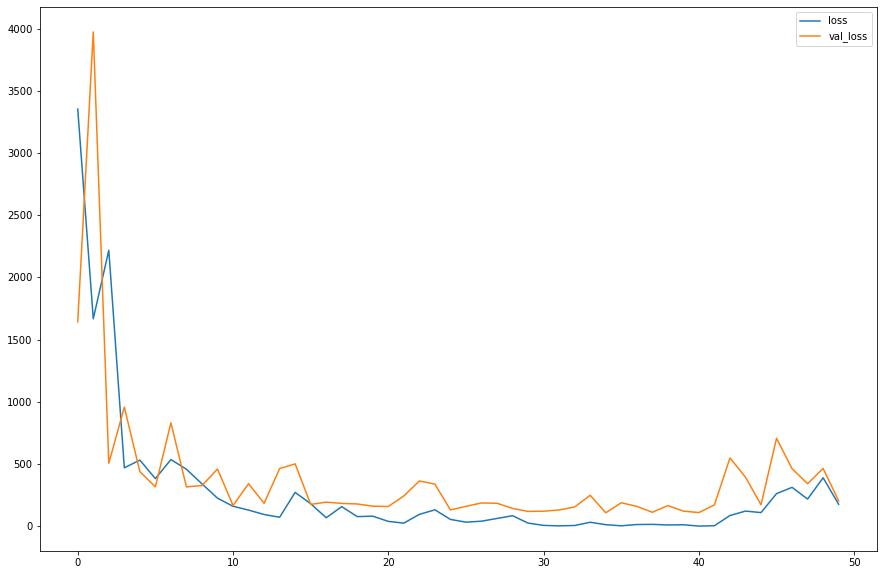

In [25]:
plt.figure(figsize=(15,10))
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

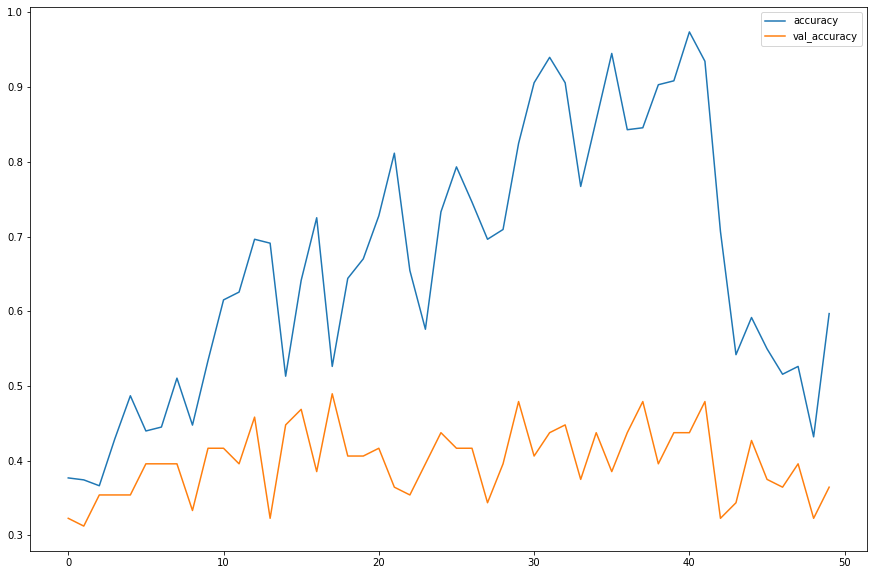

In [26]:
plt.figure(figsize=(15,10))
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()